# A basic script to compute and visualize the critical taper envelope in the space alpha vs beta

author: Arthur Bauville

This script constructs the critical taper envelope (CTE) using the 
analytical solution of Lehner (1986).
The nomenclature of angles follows Lehner (1986).
The solution has been benchmark against the graphical method of Dahlen (1984).

If you use this function please cite this repository and the original paper:
cite 1
cite 2

### References:
Dahlen, F. A. (1984). Noncohesive critical Coulomb wedges: An exact solution. 
 Journal of Geophysical Research: Solid Earth, 89(B12):10125–10133.
 
Lehner, F. K. (1986). Comments on "Noncohesive critical Coulomb wedges: 
 an exact solution" by F. A Dahlen. Journal of Geophysical Research, 
 91(B1):793-796

# MIT License

Copyright (c) 2019 abauville

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

In [22]:
# Libraries
# ================================================
import numpy as np
import matplotlib.pyplot as plt
from numpy import sin, tan, pi, arcsin, arctan

# Units
# ================================================
deg = pi/180.0      # degrees, expressed in radians 
kg  = 1.0           # kilogram
m   = 1.0           # m

In [35]:
# Basic quantities
# ================================================
rho_w       = 1000.0 * kg/m**3  # water density
rho         = 2500.0 * kg/m**3  # wedge density

phi         = 30.0 * deg        # wedge friction angle
phi_b       = 10.0 * deg        # base  friction angle

Lambda      = 0.6               # wedge fluid pressure factor
Lambda_b    = 0.9               # base  fluid pressure factor

In [36]:
# Derivative quantities
# ================================================
Lambda_hydro = rho_w/rho                                # hydrostatic fluid pressure factor
Lambda_ov    = 1.0 - (1.0-Lambda  )/(1.0-Lambda_hydro)  # wedge fluid overpressure factor
Lambda_b_ov  = 1.0 - (1.0-Lambda_b)/(1.0-Lambda_hydro)  # base  fluid overpressure factor

mu          = tan(phi)                                  # wedge friction coefficient
mu_b        = tan(phi_b)                                # base  friction coefficient
phi_b_p     = arctan(mu_b*(1.0-Lambda_b)/(1.0-Lambda))  # base effective friction angle

alpha_m     = arctan((1.0-Lambda_b_ov)*mu_b)            # Left corner of the CTE
alpha_max   = arctan((1.0-Lambda_ov)*mu)                # Angle of repose


# Solution vectors
# ================================================
n = 1000 # number of points per segment
nSeg = 4 # number of segment
alpha_all = np.zeros(nSeg*n) # surface angles of all segments
beta_all  = np.zeros(nSeg*n) # basal   angles of all segments
# List containing the alpha values at beginning and end of segments
alpha_list  = [alpha_m,alpha_max-1e-10,-alpha_m,-alpha_max+1e-10,alpha_m] 
# note: the term -1e-10 is to avoid nans (arcsin(1.0)=nan)

In [37]:
# Compute beta as a function of alpha
# ================================================
for i in range(nSeg): # Loop through the 4 segments
    alpha = np.linspace(alpha_list[i],alpha_list[i+1],n)# surface angle
    alpha_p = arctan( 1.0/(1.0-Lambda_ov)*tan(alpha) )  # effective surface angle

    theta = arcsin(sin(phi_b_p)/sin(phi))               # auxiliary friction angle
    gamma = arcsin(sin(alpha_p)/sin(phi))               # auxiliary surface  angle
        
    if i%2==0:   psi_0 = 0.5*(-gamma - alpha_p + pi)    # psi_0 = psi_0_a
    else:        psi_0 = 0.5*(+gamma - alpha_p)         # psi_0 = psi_0_p
    
    if i<2:      psi_b = 0.5*(-theta - phi_b_p + pi)    # psi_0 = pi/2-psi_b_1
    else:        psi_b = 0.5*(+theta - phi_b_p)         # psi_0 = psi_b_3

    beta =  psi_b-psi_0-alpha
    beta[beta<-pi/4.0] += pi
    
    beta_all[i*n:(i+1)*n]   = beta
    alpha_all[i*n:(i+1)*n]  = alpha
# end of segment loop

Text(0, 0.5, '$\\alpha [°]$')

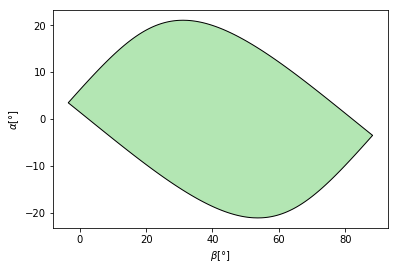

In [38]:
# Plotting
# ================================================
plt.figure(1)
plt.clf()       
plt.fill(beta_all/deg,alpha_all/deg,facecolor=[.7,.9,.7],edgecolor='k',linewidth=1.0)
plt.xlabel('$\\beta [°]$')
plt.ylabel('$\\alpha [°]$')